<a href="https://colab.research.google.com/github/riacode/StanfordAI4ALL/blob/main/Week2_Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook implements all the algorithms we learned in Week 2 of the camp on my dataset about lung cancer.

AI4ALL Camp Day 9

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['lung_normal_4tumors.csv']), encoding='utf-8')

Saving lung_normal_4tumors.csv to lung_normal_4tumors.csv


In [ ]:
data

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,40808_at,41827_f_at,34105_f_at,41165_g_at,769_s_at,33699_at,31444_s_at,33383_f_at,37039_at,32052_at,32805_at,34301_r_at,33322_i_at,35566_f_at,35083_at,33377_at,34342_s_at,32252_at,36780_at,31687_f_at,37383_f_at,39248_at,34485_r_at,AFFX,35905_s_at,676_g_at,35530_f_at,39026_r_at,41237_at,AFFX-HUMGAPDH/M33197_5_at,...,31880_at,38383_at,475_at,1245_i_at,34096_at,33793_at,37112_at,36258_at,37090_at,38879_at,41334_r_at,35681_r_at,876_at,34938_i_at,37524_at,AFFX-TrpnX-M_at,32037_r_at,32301_at,32075_at,38525_at,35894_at,35259_s_at,34544_at,39742_at,32083_at,AFFX-CreX-5_at,38911_at,33628_g_at,32012_at,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at,label
0,63.20,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,8.92,16.210,1562.50,665.35,135.43,2397.58,98.890,2290.93,-4.03,1402.85,54.280,50.230,239.640,852.820,499.25,4182.14,-8.08,1887.45,0.010,559.250,114.310,4261.15,59.96,-414.300,2565.55,5090.71,4751.66,266.57,126.50,2528.43,2570.50,...,10.540,12.16,18.630,6.490,-2.410,-11.320,5.680,15.400,-9.700,-4.84,22.680,14.590,4.870,-6.460,4.870,-33.160,3.250,0.010,10.540,-5.65,-21.83,34.020,17.020,35.64,13.780,-22.640,6.490,-15.360,2.440,-17.790,18.630,51.040,-13.740,-29.120,-28.310,20.250,28.350,4.060,-19.41,0.0
1,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,1120.10,31.420,4152.27,4600.01,3480.65,2534.08,84.500,2141.00,234.08,2577.81,67.520,1723.450,78.130,433.870,3352.11,4389.94,30.36,1061.32,18.680,894.660,32.480,3910.93,1808.95,14.430,2362.42,4509.08,3496.16,3523.09,-2.56,2127.27,2402.53,...,21.860,11.24,22.920,17.610,0.630,-4.680,9.120,17.610,2.750,-1.50,20.800,20.800,18.680,-2.560,13.370,-7.870,14.430,10.180,26.110,13.37,9.12,27.170,22.920,27.17,20.800,-14.240,16.550,-6.810,11.240,-5.740,5.940,28.230,-4.680,-13.180,-13.180,21.860,9.120,11.240,8.06,0.0
2,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,1212.90,-0.195,3623.89,1533.90,1187.76,3105.11,65.925,2784.31,476.26,2471.10,216.965,2565.110,278.155,819.100,1030.22,4743.80,16.71,1553.85,-1.125,797.565,101.705,3264.08,2372.18,-67.920,1861.83,5321.86,3302.88,1185.65,17.02,2027.95,1594.80,...,11.570,2.92,0.885,-0.810,-3.160,-14.575,-1.575,10.745,-9.295,2.47,20.535,10.815,2.735,-3.475,7.610,-25.205,5.175,0.995,22.235,1.28,-15.93,9.960,6.710,26.31,8.320,-19.730,9.905,-2.915,-0.250,-17.225,4.725,17.280,-6.590,-17.970,-16.070,10.195,17.285,6.920,-11.09,0.0
3,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,4422.72,-11.140,4812.18,3995.36,4282.76,2003.31,530.195,1914.52,1843.67,2398.00,251.770,392.635,186.300,804.645,3541.65,4335.57,34.69,880.48,-7.115,305.480,100.605,3880.54,926.18,-275.715,2340.89,5010.51,2895.65,4073.99,14.22,3546.41,1937.18,...,18.805,16.37,36.220,10.455,2.435,-4.520,13.895,12.290,-5.520,-7.52,9.915,15.845,9.915,-5.065,18.285,-15.445,11.395,-6.010,28.765,1.49,0.95,26.325,18.905,29.67,17.875,-7.555,17.290,-20.015,8.415,-10.525,11.930,38.755,-5.005,-21.445,-24.335,14.355,39.200,12.335,7.41,0.0
4,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,4116.73,-8.060,3387.26,3122.34,2268.38,2882.63,281.930,2860.16,1748.75,3219.15,314.150,30.420,41.560,785.170,2513.71,5308.86,11.18,542.78,-24.270,442.720,126.530,4939.59,605.62,365.430,2317.04,4614.94,3636.69,1939.55,0.04,3158.30,2503.90,...,9.160,-1.98,21.310,-4.010,-4.010,-13.130,0.040,2.070,-4.010,-13.13,2.070,10.170,-6.030,-13.130,0.040,-25.280,-1.980,-1.980,7.130,0.04,-19.20,14.220,16.250,20.30,11.180,-30.350,-0.970,-6.030,-10.090,-11.100,-12.110,32.450,-16.170,-13.130,-18.190,11.180,14.220,5.110,-8.06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# Similar to Baseline

In [ ]:
# We can also do value counting by a pre-made pandas function called value counts!
label_counts = data.label.value_counts()
print(label_counts)
# Do these counts match with yours? Yes!

0.0    139
3.0     21
4.0     20
1.0     17
2.0      6
Name: label, dtype: int64


In [ ]:
class GeneClassifier:
  def fit(self, X, y, num):
     self.feature = num
     self.a1 = np.mean(X.iloc[:, self.feature])

  def predict(self, X):
      labeled = []
      for i in range (0,len(X)):
        if X.iloc[i][self.feature] >= self.value:
          labeled.append(0)
        else:
          labeled.append(1)
      return labeled

  def score(self, X, y):
      y_pred = self.predict(X)
      y = np.array(y)
      num_correct = 0

      for i in range (0, len(y_pred)):
        if y_pred[i] == y[i]:
          num_correct += 1

      accuracy = num_correct/len(y)
      return accuracy

In [ ]:
best_score = 0
gene = 0
for i in range (0,12600):
  gc = GeneClassifier()
  gc.fit(X_train, y_train, i)
  y_predict = gc.predict(X_test)
  accuracy = gc.score(X_test, y_test)

  if accuracy > best_score:
    best_score = accuracy
    gene = i

print(gene, ", has an accuracy of", best_score)

NameError: ignored

# Regression

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression #These are the regression classifiers in the sklearn library

In [ ]:
#First we need to remove the 'label' column from the dataset
#Why do we need to do this?
X = data.drop('label', axis = 1)
y = data.label

# Partition the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7) #here train_size is the proportion of data to put in the training set

y_train
#How many entries are in the training data? How many in the test data?
size_test = len(y_train)
size_train = len(X_train)

In [ ]:
# Instantiate the classifier
# The parameters here are the default values for LogisticRegression,
# don't worry about them
log_clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter = 100)

# Train the classifier
log_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
train_probs = log_clf.predict_proba(X_train)[:,1]
print(train_probs)

[3.22417805e-08 1.33673437e-11 4.54137253e-10 1.13185272e-18
 9.99999826e-01 1.30379078e-14 9.99999948e-01 8.87417933e-14
 3.07680235e-15 1.00199908e-10 2.85071166e-13 9.99999913e-01
 6.10573582e-11 9.99999950e-01 3.19006345e-13 1.64397524e-13
 4.41090729e-14 3.78894109e-17 3.82489900e-10 4.87354316e-08
 4.98370492e-16 9.33005286e-11 5.91858547e-15 2.75021900e-15
 7.17472079e-16 2.34780709e-13 7.13059022e-16 1.86868583e-17
 6.36437704e-21 1.81891352e-15 1.68158267e-12 1.46749568e-16
 9.99999901e-01 6.09960359e-16 7.31803652e-18 5.72360775e-18
 5.61232885e-11 5.34192236e-08 4.92685257e-15 3.49268567e-12
 1.12141635e-14 1.58210255e-09 9.99999999e-01 4.86760924e-14
 6.11204610e-16 9.75202507e-09 1.81409149e-08 3.63530551e-11
 1.71763042e-13 6.38846064e-09 2.76338007e-07 1.21228881e-15
 1.88214603e-16 2.05007726e-19 9.99999926e-01 5.29048007e-08
 1.65065568e-13 1.27741829e-17 3.77981440e-13 2.90107248e-08
 9.99999953e-01 2.82612383e-14 1.94599031e-17 2.08697793e-08
 2.78602888e-19 3.340875

In [ ]:
threshold = 0.5

test_probs = log_clf.predict_proba(X_test)[:,1] #the predicted probabiilities for the test data

predicted_labels = [] #This will contain 0s and 1s

#One way of doing this is a loop, but feel free to use whatever method you like!
#Convert the value p (a number between 0 and 1) to either 0 or 1
for p in test_probs:
  if p > threshold:
    predicted_labels.append(1)
  else:
    predicted_labels.append(0)

In [ ]:
test_preds = log_clf.predict(X_test)

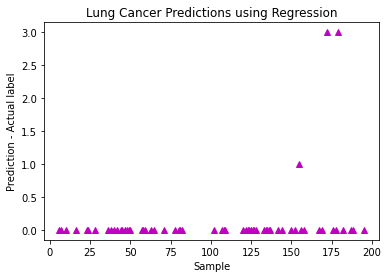

In [ ]:
# Plot the logistic regression predictions
# 'm^' means magenta is the color, triangle is the shape
plt.plot(y_test - test_preds, 'm^')

# Label axes and legend
plt.xlabel("Sample")
plt.ylabel("Prediction - Actual label")
plt.title("Lung Cancer Predictions using Regression")
#plt.legend(('Predicted - Actual'), loc="lower right", fontsize='small')
# Show the plot
plt.show()

In [ ]:
test_preds

array([2., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 4., 3., 0., 0., 0., 0.,
       0., 3., 0., 4., 0., 3., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 4., 0., 3., 0., 1., 0., 1., 0.])

In [ ]:
y_test = np.array(y_test)
y_test

array([2., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 4., 3., 0., 0., 0., 0.,
       0., 3., 0., 4., 0., 3., 0., 3., 0., 0., 0., 3., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 4., 0., 3., 0., 1., 0., 1., 3.])

In [ ]:
len(test_preds)

61

In [ ]:
X_test

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,40808_at,41827_f_at,34105_f_at,41165_g_at,769_s_at,33699_at,31444_s_at,33383_f_at,37039_at,32052_at,32805_at,34301_r_at,33322_i_at,35566_f_at,35083_at,33377_at,34342_s_at,32252_at,36780_at,31687_f_at,37383_f_at,39248_at,34485_r_at,AFFX,35905_s_at,676_g_at,35530_f_at,39026_r_at,41237_at,AFFX-HUMGAPDH/M33197_5_at,...,31760_at,31880_at,38383_at,475_at,1245_i_at,34096_at,33793_at,37112_at,36258_at,37090_at,38879_at,41334_r_at,35681_r_at,876_at,34938_i_at,37524_at,AFFX-TrpnX-M_at,32037_r_at,32301_at,32075_at,38525_at,35894_at,35259_s_at,34544_at,39742_at,32083_at,AFFX-CreX-5_at,38911_at,33628_g_at,32012_at,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at
156,1212.04,7447.10,7419.05,7425.20,5537.74,5108.22,5479.64,2703.55,6194.56,723.440,150.460,4254.86,4493.48,2068.23,1753.22,145.54,1762.00,233.360,3096.58,117.970,180.040,514.790,582.86,3731.770,5259.65,-5.74,527.790,25.630,335.410,26.610,4006.32,102.23,-366.480,2918.27,5304.17,2583.11,2621.740,100.27,2605.09,2965.13,...,-18.480,15.82,20.730,48.20,14.840,1.120,-4.76,0.140,16.800,7.00,-10.640,8.96,20.730,5.040,-5.740,7.000,-29.260,5.04,19.750,39.370,-7.700,-25.34,28.57,9.940,40.350,17.78,-36.110,16.800,10.92,2.100,-15.54,9.940,77.660,9.940,-13.580000,-13.580,5.040,32.500,26.610,-21.42
158,39.72,7672.57,6970.90,6798.40,3998.97,4263.13,4012.95,5850.31,6225.53,17.800,553.490,4231.17,3562.48,4300.80,2271.12,59.65,2234.30,28.750,2298.41,744.820,134.500,132.500,638.44,2746.750,4484.73,31.74,162.480,-32.980,414.290,284.640,4040.79,146.49,-372.660,1871.76,4016.82,3758.76,1918.560,706.30,3030.51,1688.88,...,-10.090,0.86,15.800,0.86,4.850,-6.110,-13.07,2.860,15.800,0.86,-13.070,5.84,38.720,8.830,2.860,9.830,-16.060,-0.13,7.840,42.710,-2.120,-21.04,7.84,5.840,18.790,10.82,-18.050,6.840,-25.02,0.860,-17.06,4.850,20.780,-2.120,-33.980000,-26.010,17.800,2.860,3.850,-17.06
135,256.74,5150.37,4997.91,5123.34,5412.46,6704.19,5033.00,918.91,4386.03,5457.000,-39.550,2064.20,1760.89,406.93,3227.88,280.56,2850.54,2671.830,2479.91,687.640,334.480,127.260,1029.39,1114.800,4976.39,32.65,886.230,-29.090,257.430,212.360,3527.75,2229.97,-173.890,2081.84,5779.03,4887.84,503.880,96.40,3745.75,2826.75,...,-23.200,8.28,-0.260,6.31,-5.510,-12.730,-22.55,-12.070,1.710,-15.35,-37.590,-2.23,3.680,-9.450,-17.970,-8.790,-20.590,-6.82,-13.380,18.150,-16.000,-24.51,7.62,-2.230,14.200,4.99,-21.240,16.170,-33.67,-5.510,-19.28,4.990,22.100,-25.170,-29.750000,-32.360,10.250,17.490,-6.170,-4.86
65,1342.93,2425.49,4853.18,4422.57,5456.68,5512.05,5291.20,2030.83,3595.91,343.825,-20.925,2420.01,1372.78,1306.88,3566.02,783.52,3379.79,161.370,4112.35,3055.180,61.160,178.430,579.15,939.295,6266.54,-19.01,728.595,-13.130,1196.090,2250.740,4336.96,507.97,272.210,1838.08,3979.26,3104.92,932.645,366.71,3363.84,1732.54,...,-22.315,14.62,8.265,14.05,7.715,-3.235,-8.80,22.160,16.565,-7.14,-9.245,-0.58,24.600,6.430,1.230,8.505,-14.760,2.57,1.335,26.835,-7.065,-9.30,18.04,13.575,46.030,20.53,-23.365,10.345,-17.35,13.965,-15.70,5.695,33.765,1.835,-19.640000,-9.715,11.260,13.520,10.895,-11.00
128,2052.25,5288.54,6042.00,6058.05,7368.43,6410.45,6153.05,1368.19,4715.09,4047.370,-15.110,3014.07,2764.06,661.56,3843.51,2473.58,3573.33,3066.780,2367.90,686.910,588.310,960.850,894.62,2766.190,4605.14,16.01,3578.900,4.940,682.810,266.050,2634.54,961.74,211.520,1787.10,4719.82,4159.60,1216.870,93.82,2405.92,2559.31,...,-36.520,-4.74,-12.340,-1.28,-5.430,-20.640,-35.83,-17.180,-15.110,-20.64,-37.900,-6.81,1.480,-10.960,-20.640,-10.960,-46.880,-10.27,-12.340,18.090,-18.560,-28.23,20.86,0.100,17.400,2.87,-37.210,-19.950,-27.54,-23.400,-23.40,-2.670,22.250,-22.710,-43.420000,-41.350,1.480,13.240,-15.110,-6.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
log_clf.score(test_preds, y_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_preds, y_test)

[Text(30.5, 0.5, 'Predictions'),
 Text(0.5, 12.5, 'Ground-Truth'),
 Text(0.5, 1.0, 'Confusion Matrix for Regression')]

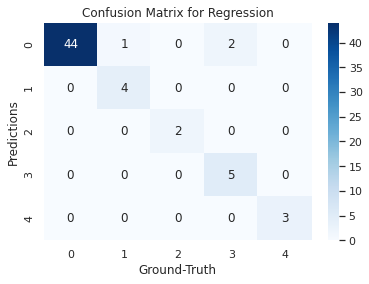

In [ ]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
ax.set(title="Confusion Matrix for Regression", xlabel="Ground-Truth", ylabel = "Predictions")

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_preds))

0.9508196721311475


# KNN

In [ ]:
from sklearn import neighbors

# Break the dataset up into the examples (X) and their labels (y)
X = data.drop(columns ="label")
y = data.label

# Split up the X and y datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
k = 1
knn_lung = neighbors.KNeighborsClassifier(n_neighbors=k, metric="euclidean")

# Train the classifer
knn_lung.fit(X_train, y_train)

# Compute the score (mean accuracy) on test set
score = knn_lung.score(X_test, y_test)
print('KNN score for Lung Cancer: %f' % score)

KNN score for Lung Cancer: 0.921569


In [ ]:
#Iterate through a range of k's for KNN Classifier
# print or track the accuracy across k's

my_ks = np.arange(1,55)
accuracies = []

for k in my_ks:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric="euclidean")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  accuracies.append(score)
  print('KNN score for', k, ': %f' % score)

KNN score for 1 : 0.921569
KNN score for 2 : 0.921569
KNN score for 3 : 0.941176
KNN score for 4 : 0.960784
KNN score for 5 : 0.960784
KNN score for 6 : 0.941176
KNN score for 7 : 0.941176
KNN score for 8 : 0.941176
KNN score for 9 : 0.941176
KNN score for 10 : 0.941176
KNN score for 11 : 0.941176
KNN score for 12 : 0.862745
KNN score for 13 : 0.882353
KNN score for 14 : 0.862745
KNN score for 15 : 0.862745
KNN score for 16 : 0.862745
KNN score for 17 : 0.862745
KNN score for 18 : 0.862745
KNN score for 19 : 0.862745
KNN score for 20 : 0.823529
KNN score for 21 : 0.843137
KNN score for 22 : 0.823529
KNN score for 23 : 0.823529
KNN score for 24 : 0.823529
KNN score for 25 : 0.823529
KNN score for 26 : 0.764706
KNN score for 27 : 0.764706
KNN score for 28 : 0.764706
KNN score for 29 : 0.764706
KNN score for 30 : 0.764706
KNN score for 31 : 0.764706
KNN score for 32 : 0.764706
KNN score for 33 : 0.764706
KNN score for 34 : 0.705882
KNN score for 35 : 0.705882
KNN score for 36 : 0.686275
K

Text(0.5, 1.0, 'Accuracies for Different k Values')

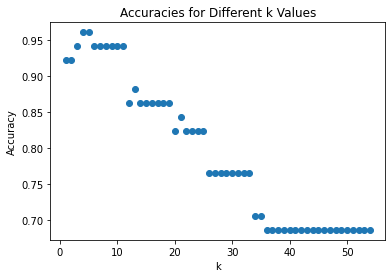

In [ ]:
#Plot your accuracies!
plt.scatter(my_ks, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracies for Different k Values")

In [ ]:
print(np.max(accuracies))

0.9607843137254902


In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=4, metric="euclidean")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(score)

0.9607843137254902


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test_labels, pred)

In [ ]:
print(clf_lr.coef_)

# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
random_state = 42


In [ ]:
X = data.drop('label', axis = 1)
y = data.label
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

kmeans_clf = KMeans(n_clusters=5, random_state=random_state)
y_pred = kmeans_clf.fit_predict(X)

In [ ]:
def accuracy(predicted, actual):
    '''
    predicted: array of the predicted values (0 or 1)
    actual: array of the real values (0 or 1)
    '''
    predicted = np.array(predicted)
    actual = np.array(actual)
    right = 0
    for x in range (0,len(predicted)):
      if predicted[x] == actual[x]:
        right += 1

    return right/len(predicted)

In [ ]:
#Accuracy for the test set
print(accuracy(y_pred, y))

0.22660098522167488


In [ ]:
best_acc = 0
final_i = 0
for i in range (12599):
  kmeans_clf = KMeans(n_clusters=5, random_state=42)
  y_pred = kmeans_clf.fit_predict(X.iloc[:,i:(i+2)])
  save = accuracy(y_pred, y)
  if (save > best_acc):
    best_acc = save
    final_i = i

In [ ]:
best_acc

In [ ]:
final_i = 554

In [ ]:
X.iloc[:,554]

0       -33.160
1        -5.740
2       -20.680
3       -35.495
4       -33.390
         ...   
198      53.090
199      -1.770
200       3.510
201    2320.470
202     -16.930
Name: 1430_at , Length: 203, dtype: float64

In [ ]:
X.iloc[:,555]

0        74.550
1        72.830
2        53.270
3        44.635
4       218.420
         ...   
198      58.810
199    1364.530
200      78.040
201     134.190
202    1032.740
Name: 36155_at , Length: 203, dtype: float64

In [ ]:
kmeans_clf = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans_clf.fit_predict(X.iloc[:,final_i:(final_i+2)])

In [ ]:
print(accuracy(y_pred, y))

0.7241379310344828


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 4,
       0, 4, 0, 2, 4], dtype=int32)

In [ ]:
np.array(y)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

Text(0.5, 1.0, 'K-Means Predictions for Lung Cancer')

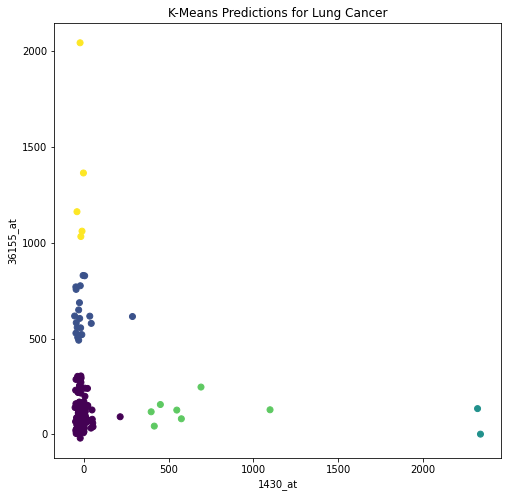

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X.iloc[:, final_i], X.iloc[:, final_i + 1], c=y_pred)
plt.xlabel('1430_at')
plt.ylabel('36155_at')
plt.title('K-Means Predictions for Lung Cancer')

Text(0.5, 1.0, 'Ground-Truth for Lung Cancer')

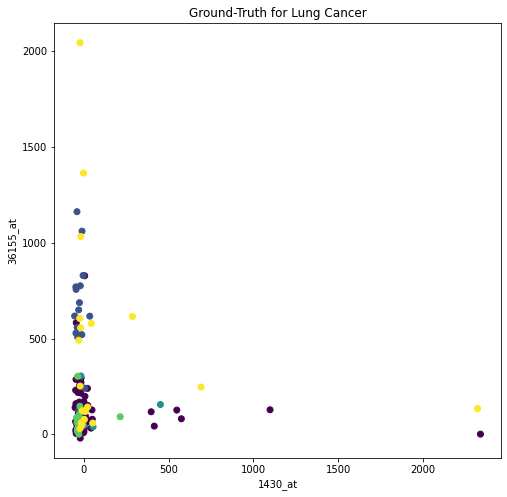

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X.iloc[:, final_i], X.iloc[:, final_i + 1], c=y)
plt.xlabel('1430_at')
plt.ylabel('36155_at')
plt.title('Ground-Truth for Lung Cancer')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y)

[Text(30.5, 0.5, 'Predictions'),
 Text(0.5, 12.5, 'Ground-Truth'),
 Text(0.5, 1.0, 'Confusion Matrix for K-Means')]

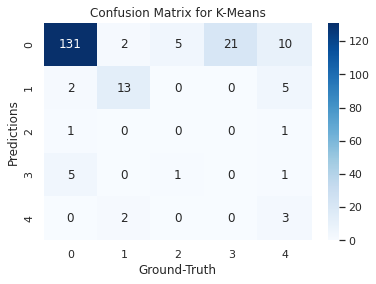

In [ ]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
ax.set(title="Confusion Matrix for K-Means", xlabel="Ground-Truth", ylabel = "Predictions")